# color with hsv

HSL (hue, saturation, lightness) and HSV (hue, saturation, value) are alternative representations of the RGB color model. 

Code snippets and ideas from https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/



In [39]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import Counter
import cv2
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
import time
from sklearn.metrics import calinski_harabaz_score

In [40]:
def get_dominant_color(image, k, image_processing_size = (50, 50)):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input


    """
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 

    clt = MiniBatchKMeans(n_clusters = k).fit(image)    
   
    
#     clt_2 = MiniBatchKMeans(n_clusters = k-2).fit(image)
#     clt_3 = MiniBatchKMeans(n_clusters = k-1).fit(image)
#     clt_5 = MiniBatchKMeans(n_clusters = k+1).fit(image)
#     clt_6 = MiniBatchKMeans(n_clusters = k+2).fit(image)
#     clt_7 = MiniBatchKMeans(n_clusters = k+3).fit(image)
#     clt_8 = MiniBatchKMeans(n_clusters = k+4).fit(image)
#     clt_9 = MiniBatchKMeans(n_clusters = k+5).fit(image)
#     clt_10 = MiniBatchKMeans(n_clusters = k+6).fit(image)
#     clt_11 = MiniBatchKMeans(n_clusters = k+7).fit(image)
#     clt_12 = MiniBatchKMeans(n_clusters = k+8).fit(image)
    
#     clt_list = [clt, clt_2, clt_3, clt_5, clt_6, clt_7, clt_8, clt_9, clt_10,
#                  clt_11,  clt_12]
#     CH_score = []

#     for model in clt_list:
#         labels = model.labels_
#         CH_score.append(calinski_harabaz_score(image, labels))
    
#     plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], CH_score)
#     plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#     plt.title("Calinski Harabaz Scores for Different Values of K")
#     plt.ylabel("Variance Ratio")
#     plt.xlabel("K=")
#     plt.show()
    
#     clt = MiniBatchKMeans(init='k-means++', n_clusters=k, batch_size=45,
#                       n_init=10, max_no_improvement=10, verbose=0).fit(image)
    
    labels = clt.predict(image)
    
#     plt.scatter(image[:, 0], image[:, 1], c=labels, s=10)
#     centers = clt.cluster_centers_
#     plt.scatter(centers[:,0], centers[:, 1], c='black', s=70)
#     plt.show()

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
    dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
    dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]
    dominant_color_4 = clt.cluster_centers_[label_counts.most_common(4)[3][0]]
    dominant_color_5 = clt.cluster_centers_[label_counts.most_common(5)[4][0]]
    dominant_color_6 = clt.cluster_centers_[label_counts.most_common(6)[5][0]]

    return list(dominant_color_1), list(dominant_color_2), list(dominant_color_3), list(dominant_color_4), list(dominant_color_5), list(dominant_color_6)

get_dominant_color function: 2.569s

Most prominent color:
red: 11  green:  15  blue:  18 
Hex:  #0b0f12

Second color:
red: 211  green:  15  blue:  189 
Hex:  #d3cbbd

Third color:
red: 56  green:  15  blue:  31 
Hex:  #382a1f

Fourth color:
red: 38  green:  36  blue:  31 
Hex:  #26241f

Fifth color:
red: 199  green:  138  blue:  97 
Hex:  #c78a61

Sixth color:
red: 76  green:  29  blue:  12 
Hex:  #4c1d0c


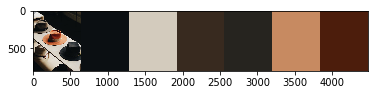

get_dominant_color function: 2.049s

Most prominent color:
red: 171  green:  163  blue:  146 
Hex:  #aba392

Second color:
red: 212  green:  163  blue:  219 
Hex:  #d4d7db

Third color:
red: 15  green:  163  blue:  23 
Hex:  #0f1217

Fourth color:
red: 100  green:  75  blue:  53 
Hex:  #644b35

Fifth color:
red: 40  green:  35  blue:  28 
Hex:  #28231c

Sixth color:
red: 7  green:  52  blue:  31 
Hex:  #07341f


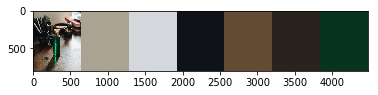

get_dominant_color function: 2.134s

Most prominent color:
red: 200  green:  206  blue:  211 
Hex:  #c8ced3

Second color:
red: 100  green:  206  blue:  117 
Hex:  #646f75

Third color:
red: 136  green:  206  blue:  106 
Hex:  #88746a

Fourth color:
red: 204  green:  165  blue:  136 
Hex:  #cca588

Fifth color:
red: 22  green:  33  blue:  41 
Hex:  #162129

Sixth color:
red: 7  green:  20  blue:  28 
Hex:  #07141c


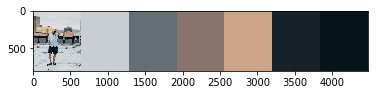

get_dominant_color function: 2.213s

Most prominent color:
red: 53  green:  80  blue:  84 
Hex:  #355054

Second color:
red: 23  green:  80  blue:  46 
Hex:  #17292e

Third color:
red: 67  green:  80  blue:  91 
Hex:  #43575b

Fourth color:
red: 116  green:  104  blue:  86 
Hex:  #746856

Fifth color:
red: 184  green:  178  blue:  160 
Hex:  #b8b2a0

Sixth color:
red: 1  green:  22  blue:  23 
Hex:  #011617


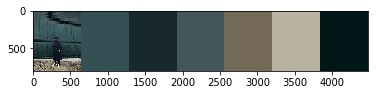

get_dominant_color function: 2.287s

Most prominent color:
red: 175  green:  89  blue:  58 
Hex:  #af593a

Second color:
red: 63  green:  89  blue:  23 
Hex:  #3f1b17

Third color:
red: 187  green:  89  blue:  119 
Hex:  #bb8e77

Fourth color:
red: 106  green:  75  blue:  70 
Hex:  #6a4b46

Fifth color:
red: 40  green:  15  blue:  23 
Hex:  #280f17

Sixth color:
red: 46  green:  31  blue:  41 
Hex:  #2e1f29


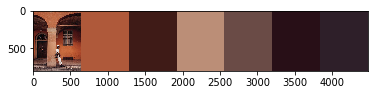

get_dominant_color function: 2.136s

Most prominent color:
red: 182  green:  183  blue:  172 
Hex:  #b6b7ac

Second color:
red: 168  green:  183  blue:  148 
Hex:  #a8a294

Third color:
red: 39  green:  183  blue:  48 
Hex:  #272a30

Fourth color:
red: 127  green:  117  blue:  106 
Hex:  #7f756a

Fifth color:
red: 11  green:  19  blue:  24 
Hex:  #0b1318

Sixth color:
red: 168  green:  103  blue:  86 
Hex:  #a86756


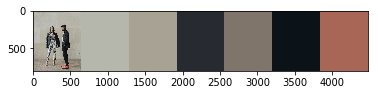

get_dominant_color function: 2.273s

Most prominent color:
red: 219  green:  201  blue:  184 
Hex:  #dbc9b8

Second color:
red: 167  green:  201  blue:  152 
Hex:  #a79f98

Third color:
red: 45  green:  201  blue:  54 
Hex:  #2d3136

Fourth color:
red: 100  green:  60  blue:  40 
Hex:  #643c28

Fifth color:
red: 92  green:  94  blue:  86 
Hex:  #5c5e56

Sixth color:
red: 182  green:  135  blue:  100 
Hex:  #b68764


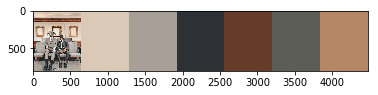

get_dominant_color function: 2.212s

Most prominent color:
red: 168  green:  163  blue:  149 
Hex:  #a8a395

Second color:
red: 128  green:  163  blue:  105 
Hex:  #807c69

Third color:
red: 87  green:  163  blue:  63 
Hex:  #574b3f

Fourth color:
red: 161  green:  128  blue:  63 
Hex:  #a1803f

Fifth color:
red: 32  green:  37  blue:  33 
Hex:  #202521

Sixth color:
red: 48  green:  48  blue:  8 
Hex:  #303008


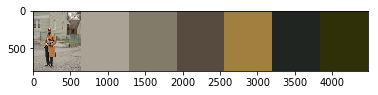

get_dominant_color function: 2.541s

Most prominent color:
red: 33  green:  50  blue:  61 
Hex:  #21323d

Second color:
red: 139  green:  50  blue:  67 
Hex:  #8b4c43

Third color:
red: 78  green:  50  blue:  32 
Hex:  #4e2220

Fourth color:
red: 66  green:  33  blue:  38 
Hex:  #422126

Fifth color:
red: 15  green:  14  blue:  19 
Hex:  #0f0e13

Sixth color:
red: 42  green:  31  blue:  27 
Hex:  #2a1f1b


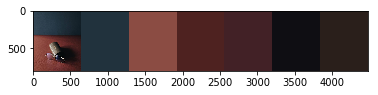

get_dominant_color function: 1.763s

Most prominent color:
red: 0  green:  0  blue:  0 
Hex:  #000000

Second color:
red: 200  green:  0  blue:  76 
Hex:  #c89e4c

Third color:
red: 146  green:  0  blue:  44 
Hex:  #92702c

Fourth color:
red: 235  green:  212  blue:  149 
Hex:  #ebd495

Fifth color:
red: 19  green:  13  blue:  0 
Hex:  #130d00

Sixth color:
red: 1  green:  0  blue:  8 
Hex:  #010008


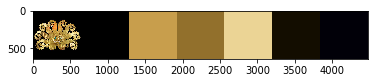

get_dominant_color function: 2.236s

Most prominent color:
red: 225  green:  224  blue:  224 
Hex:  #e1e0e0

Second color:
red: 168  green:  224  blue:  156 
Hex:  #a8a39c

Third color:
red: 14  green:  224  blue:  23 
Hex:  #0e1317

Fourth color:
red: 86  green:  82  blue:  80 
Hex:  #565250

Fifth color:
red: 40  green:  41  blue:  46 
Hex:  #28292e

Sixth color:
red: 203  green:  202  blue:  205 
Hex:  #cbcacd


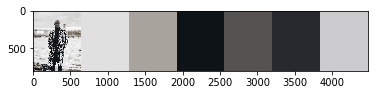

get_dominant_color function: 2.263s

Most prominent color:
red: 212  green:  208  blue:  197 
Hex:  #d4d0c5

Second color:
red: 170  green:  208  blue:  148 
Hex:  #aaa194

Third color:
red: 148  green:  208  blue:  54 
Hex:  #945536

Fourth color:
red: 82  green:  49  blue:  38 
Hex:  #523126

Fifth color:
red: 207  green:  150  blue:  107 
Hex:  #cf966b

Sixth color:
red: 49  green:  40  blue:  52 
Hex:  #312834


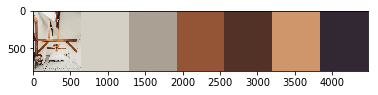

get_dominant_color function: 2.155s

Most prominent color:
red: 196  green:  197  blue:  191 
Hex:  #c4c5bf

Second color:
red: 211  green:  197  blue:  207 
Hex:  #d3d4cf

Third color:
red: 163  green:  197  blue:  79 
Hex:  #a3764f

Fourth color:
red: 202  green:  170  blue:  139 
Hex:  #caaa8b

Fifth color:
red: 34  green:  40  blue:  28 
Hex:  #22281c

Sixth color:
red: 82  green:  46  blue:  19 
Hex:  #522e13


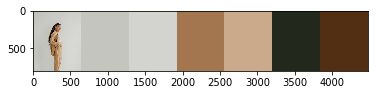

get_dominant_color function: 3.052s

Most prominent color:
red: 98  green:  93  blue:  80 
Hex:  #625d50

Second color:
red: 157  green:  93  blue:  127 
Hex:  #9d8c7f

Third color:
red: 46  green:  93  blue:  37 
Hex:  #2e3325

Fourth color:
red: 16  green:  32  blue:  17 
Hex:  #102011

Fifth color:
red: 3  green:  22  blue:  14 
Hex:  #03160e

Sixth color:
red: 110  green:  61  blue:  37 
Hex:  #6e3d25


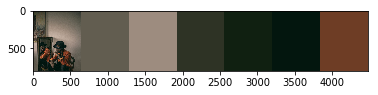

get_dominant_color function: 3.084s

Most prominent color:
red: 88  green:  87  blue:  79 
Hex:  #58574f

Second color:
red: 45  green:  87  blue:  52 
Hex:  #2d3234

Third color:
red: 81  green:  87  blue:  93 
Hex:  #51595d

Fourth color:
red: 193  green:  172  blue:  149 
Hex:  #c1ac95

Fifth color:
red: 140  green:  118  blue:  100 
Hex:  #8c7664

Sixth color:
red: 90  green:  65  blue:  51 
Hex:  #5a4133


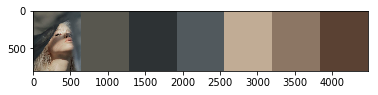

get_dominant_color function: 3.053s

Most prominent color:
red: 179  green:  96  blue:  66 
Hex:  #b36042

Second color:
red: 66  green:  96  blue:  26 
Hex:  #421e1a

Third color:
red: 150  green:  96  blue:  105 
Hex:  #967369

Fourth color:
red: 34  green:  17  blue:  23 
Hex:  #221117

Fifth color:
red: 44  green:  13  blue:  23 
Hex:  #2c0d17

Sixth color:
red: 60  green:  44  blue:  53 
Hex:  #3c2c35


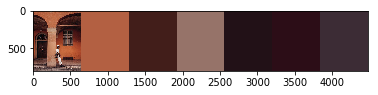

get_dominant_color function: 2.246s

Most prominent color:
red: 83  green:  35  blue:  31 
Hex:  #53231f

Second color:
red: 16  green:  35  blue:  30 
Hex:  #10181e

Third color:
red: 56  green:  35  blue:  29 
Hex:  #38191d

Fourth color:
red: 31  green:  21  blue:  26 
Hex:  #1f151a

Fifth color:
red: 69  green:  80  blue:  85 
Hex:  #455055

Sixth color:
red: 196  green:  215  blue:  172 
Hex:  #c4d7ac


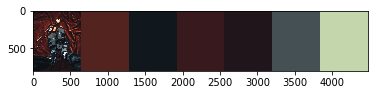

get_dominant_color function: 2.534s

Most prominent color:
red: 178  green:  160  blue:  152 
Hex:  #b2a098

Second color:
red: 116  green:  160  blue:  95 
Hex:  #74655f

Third color:
red: 81  green:  160  blue:  49 
Hex:  #513b31

Fourth color:
red: 145  green:  137  blue:  143 
Hex:  #91898f

Fifth color:
red: 84  green:  76  blue:  83 
Hex:  #544c53

Sixth color:
red: 21  green:  18  blue:  32 
Hex:  #151220


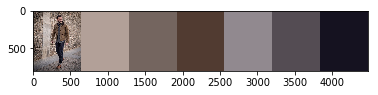

get_dominant_color function: 2.154s

Most prominent color:
red: 161  green:  165  blue:  152 
Hex:  #a1a598

Second color:
red: 120  green:  165  blue:  87 
Hex:  #786e57

Third color:
red: 147  green:  165  blue:  53 
Hex:  #936d35

Fourth color:
red: 44  green:  42  blue:  28 
Hex:  #2c2a1c

Fifth color:
red: 31  green:  35  blue:  30 
Hex:  #1f231e

Sixth color:
red: 212  green:  216  blue:  219 
Hex:  #d4d8db


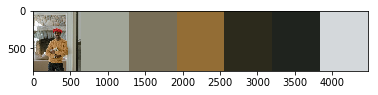

get_dominant_color function: 2.278s

Most prominent color:
red: 117  green:  142  blue:  153 
Hex:  #758e99

Second color:
red: 156  green:  142  blue:  178 
Hex:  #9cb1b2

Third color:
red: 100  green:  142  blue:  134 
Hex:  #647886

Fourth color:
red: 193  green:  200  blue:  189 
Hex:  #c1c8bd

Fifth color:
red: 210  green:  185  blue:  142 
Hex:  #d2b98e

Sixth color:
red: 38  green:  52  blue:  40 
Hex:  #263428


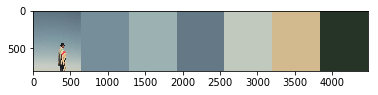

get_dominant_color function: 2.119s

Most prominent color:
red: 224  green:  225  blue:  218 
Hex:  #e0e1da

Second color:
red: 183  green:  225  blue:  161 
Hex:  #b7afa1

Third color:
red: 109  green:  225  blue:  90 
Hex:  #6d635a

Fourth color:
red: 177  green:  134  blue:  101 
Hex:  #b18665

Fifth color:
red: 113  green:  121  blue:  118 
Hex:  #717976

Sixth color:
red: 57  green:  57  blue:  67 
Hex:  #393943


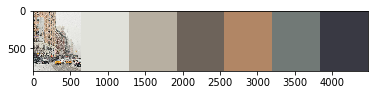

get_dominant_color function: 2.178s

Most prominent color:
red: 209  green:  209  blue:  203 
Hex:  #d1d1cb

Second color:
red: 42  green:  209  blue:  52 
Hex:  #2a2934

Third color:
red: 146  green:  209  blue:  136 
Hex:  #928e88

Fourth color:
red: 110  green:  111  blue:  117 
Hex:  #6e6f75

Fifth color:
red: 78  green:  74  blue:  69 
Hex:  #4e4a45

Sixth color:
red: 90  green:  56  blue:  45 
Hex:  #5a382d


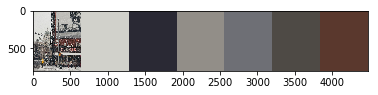

get_dominant_color function: 1.829s

Most prominent color:
red: 22  green:  23  blue:  27 
Hex:  #16171b

Second color:
red: 22  green:  23  blue:  30 
Hex:  #161b1e

Third color:
red: 17  green:  23  blue:  25 
Hex:  #111519

Fourth color:
red: 19  green:  20  blue:  25 
Hex:  #131419

Fifth color:
red: 16  green:  19  blue:  17 
Hex:  #101311

Sixth color:
red: 17  green:  20  blue:  26 
Hex:  #11141a


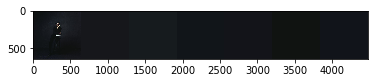

In [41]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--imagePath", required=True,
# 	help="Path to image to find dominant color of")
# ap.add_argument("-k", "--clusters", default=3, type=int,
# 	help="Number of clusters to use in kmeans when finding dominant color")
# args = vars(ap.parse_args())


for i in glob.glob('./fohrtestimages/*'):
    #read in image of interest
    bgr_image = cv2.imread(i)
    #convert to HSV; this is a better representation of how we see color
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    
    #extract 3 most dominant colors
    # (aka the centroid of the most popular k means cluster)
    start=time.time()
    dom_color_1, dom_color_2, dom_color_3, dom_color_4, dom_color_5, dom_color_6 = get_dominant_color(hsv_image, k=6)
    print('get_dominant_color function: {:.3f}s'.format(time.time()-start))
    
    #create a square showing dominant color of equal size to input image
    dom_color_1_hsv = np.full(bgr_image.shape, dom_color_1, dtype='uint8')
    #convert to bgr color space for display
    dom_color_1_rgb = cv2.cvtColor(dom_color_1_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_2_hsv = np.full(bgr_image.shape, dom_color_2, dtype='uint8')
    #convert to bgr color space for display
    dom_color_2_rgb = cv2.cvtColor(dom_color_2_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_3_hsv = np.full(bgr_image.shape, dom_color_3, dtype='uint8')
    #convert to bgr color space for display
    dom_color_3_rgb = cv2.cvtColor(dom_color_3_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_4_hsv = np.full(bgr_image.shape, dom_color_4, dtype='uint8')
    #convert to bgr color space for display
    dom_color_4_rgb = cv2.cvtColor(dom_color_4_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_5_hsv = np.full(bgr_image.shape, dom_color_5, dtype='uint8')
    #convert to bgr color space for display
    dom_color_5_rgb = cv2.cvtColor(dom_color_5_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_6_hsv = np.full(bgr_image.shape, dom_color_6, dtype='uint8')
    #convert to bgr color space for display
    dom_color_6_rgb = cv2.cvtColor(dom_color_6_hsv, cv2.COLOR_HSV2RGB)
    
    #concat input image and dom color square side by side for display
    output_image = np.hstack((bgr_image[:,:,::-1], dom_color_1_rgb, dom_color_2_rgb, dom_color_3_rgb, dom_color_4_rgb, dom_color_5_rgb, dom_color_6_rgb))
    
    #show results to screen
    print('\nMost prominent color:\nred:', dom_color_1_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_1_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], 
                                                                             dom_color_1_rgb[0][0][1], 
                                                                             dom_color_1_rgb[0][0][2]))
    
    print('\nSecond color:\nred:', dom_color_2_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_2_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], 
                                                                             dom_color_2_rgb[0][0][1],
                                                                             dom_color_2_rgb[0][0][2]))
    
    print('\nThird color:\nred:', dom_color_3_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_3_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], 
                                                                             dom_color_3_rgb[0][0][1], 
                                                                             dom_color_3_rgb[0][0][2]))
    print('\nFourth color:\nred:', dom_color_4_rgb[0][0][0], ' green: ', dom_color_4_rgb[0][0][1],
          ' blue: ', dom_color_4_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_4_rgb[0][0][0], 
                                                                             dom_color_4_rgb[0][0][1], 
                                                                             dom_color_4_rgb[0][0][2]))
    
    print('\nFifth color:\nred:', dom_color_5_rgb[0][0][0], ' green: ', dom_color_5_rgb[0][0][1],
          ' blue: ', dom_color_5_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_5_rgb[0][0][0], 
                                                                             dom_color_5_rgb[0][0][1],
                                                                             dom_color_5_rgb[0][0][2]))
    
    print('\nSixth color:\nred:', dom_color_6_rgb[0][0][0], ' green: ', dom_color_6_rgb[0][0][1],
          ' blue: ', dom_color_6_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_6_rgb[0][0][0], 
                                                                             dom_color_6_rgb[0][0][1], 
                                                                             dom_color_6_rgb[0][0][2]))
    plt.imshow(output_image)
    plt.show()

In [49]:
dom_color = [94, 98, 88]
print('#%02x%02x%02x' % (int(dom_color[2]), int(dom_color[1]), int(dom_color[0])))

#58625e


Test of getting the Hue Saturation and Value

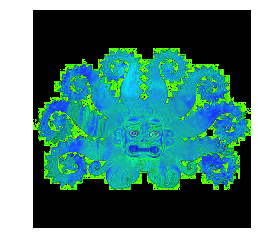

In [50]:
image = cv2.imread('./fohrtestimages/fohrimage.jpg')
image = cv2.resize(image,(224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [51]:
image.shape

(224, 224, 3)

In [52]:
oriimg = cv2.imread('./fohrtestimages/fohrimage3.jpg',cv2.COLORMAP_HSV)
img = cv2.resize(oriimg,(50,50))

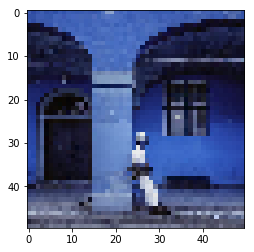

In [53]:
plt.imshow(img)

In [54]:

img = img.reshape((img.shape[0] * img.shape[1], 3))

    #cluster and assign labels to the pixels 
clt = KMeans(n_clusters = 35)
labels = clt.fit_predict(img)

    #count labels to find most popular
label_counts = Counter(labels)

    #subset out most popular centroid
dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]


In [55]:
dominant_color_1

array([15.43457944, 14.47196262, 29.48130841])

In [56]:
label_counts.most_common(3)[1][0]

13

In [57]:
hex1 = '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], dom_color_1_rgb[0][0][1], dom_color_1_rgb[0][0][2])
hex2 = '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], dom_color_2_rgb[0][0][1], dom_color_2_rgb[0][0][2])
hex3 = '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], dom_color_3_rgb[0][0][1], dom_color_3_rgb[0][0][2])

In [58]:
color_dict = {'first_color':{'red': int(dom_color_1_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_1_rgb[0][0][2]), 
'hex': hex1}, 'second_color':{'red': int(dom_color_2_rgb[0][0][0]), 'green':int(dom_color_1_rgb[0][0][1]), 'blue: ': int(dom_color_2_rgb[0][0][2]), 'hex': hex2}, 
              'third_color':{'red': int(dom_color_3_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_3_rgb[0][0][2]), 
'hex': hex3}}

In [59]:
type(color_dict['first_color']['hex'])

str

In [60]:
print(json.dumps(color_dict))

{"first_color": {"red": 17, "green": 22, "blue": 25, "hex": "#111619"}, "second_color": {"red": 23, "green": 22, "blue: ": 29, "hex": "#17181d"}, "third_color": {"red": 15, "green": 22, "blue": 16, "hex": "#0f1210"}}
